Some methods to simulate data for crunching and analysing. First import libraries:

In [1]:
# import numpy
import numpy as np
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import tools for 3d plot
from mpl_toolkits.mplot3d import Axes3D
#import seaborn
import seaborn as sns
# import make_classification, make_regression, make_blobs from sci-kit learn
from sklearn.datasets import make_regression, make_multilabel_classification, make_classification, make_blobs
# set to plot automatically
%matplotlib inline

Then set number of samples and random seed

In [2]:
# set number of samples to simulate
n=100

# 1. Simulated data for regression

In [3]:
# make simulated data for regression with 100 samples
X, y = make_regression(n_samples=n,
                       # 5 features
                       n_features=5,
                       # 3 features are useful
                       n_informative=3,
                       # a single target
                       n_targets=1,
                       # standard deviation of random noise
                       noise=0,
                       # set the random state for repeatable results
                       random_state=42)

#### View simulated data

In [4]:
# concatenate x and y values
data = np.concatenate((X, y.reshape(n,-1)), axis=1)
# view the first five rows of simulated features
pd.DataFrame(data,columns=['feature 1','feature 2','feature 3','feature 4','feature 5','target']).head()

,feature 1,feature 2,feature 3,feature 4,feature 5,target
0,0.096996,2.092387,0.595157,-1.006017,-0.818221,11.098838
1,-0.334501,1.765454,-0.474945,0.404982,-0.653329,-71.979700
2,-0.601707,-1.057711,1.852278,0.822545,-0.013497,66.378121
3,-0.714351,-1.191303,1.865775,0.656554,0.473833,77.226207
4,0.821903,0.091761,0.087047,-1.987569,-0.299007,47.409004


# 2. Simulated data for classification

In [5]:
# make simulated data for classification
X,y = make_classification(n_samples=n,
                          # 5 features
                          n_features=5,
                          # 3 features are useful
                          n_informative=3,
                          # 1 redundant feature - a linear combination of important feature
                          n_redundant=1,
                          # number of classes - target variable
                          n_classes=3,
                          # 30% first class, 40% second class, 30% third class
                          weights = [.3,.4,.3],
                          # percentage of samples which are randomly exchanged between classes
                          flip_y=0.05,
                          # set the random state for repeatable results
                          random_state=42)

#### View simulated data

In [6]:
# concatenate x and y values
data = np.concatenate((X, y.reshape(n,-1)), axis=1)
# view the first five rows of simulated features
pd.DataFrame(data,columns=['feature 1','feature 2','feature 3','feature 4','feature 5','target']).head()

,feature 1,feature 2,feature 3,feature 4,feature 5,target
0,-1.097346,-1.448538,-1.062397,-1.870558,0.076353,2.0
1,-0.313024,2.669997,-1.295585,2.138008,1.930662,0.0
2,0.169973,-1.727125,0.133786,-0.207884,0.830146,1.0
3,0.976309,1.014236,-0.055047,0.512213,-0.076900,1.0
4,0.403119,0.184039,-1.100488,-1.106329,-0.169689,2.0


# 3. Simulated data for clustering

In [7]:
# make simulated data for clustering
X, y = make_blobs(n_samples=n,
                  # 3 features
                  n_features=3,
                  # 3 clusters
                  centers=3,
                  # with standard deviation 1.4
                  cluster_std=1.4,
                  # set the random state for repeatable results
                  random_state=42)

#### View simulated data

In [8]:
# create dictionary to map classes to colours
colours = {0:'red', 1:'blue', 2:'green'}
# create list of colours of points from classes
colour_points = list(pd.DataFrame(y).replace(colours).values.reshape(-1,n)[0])

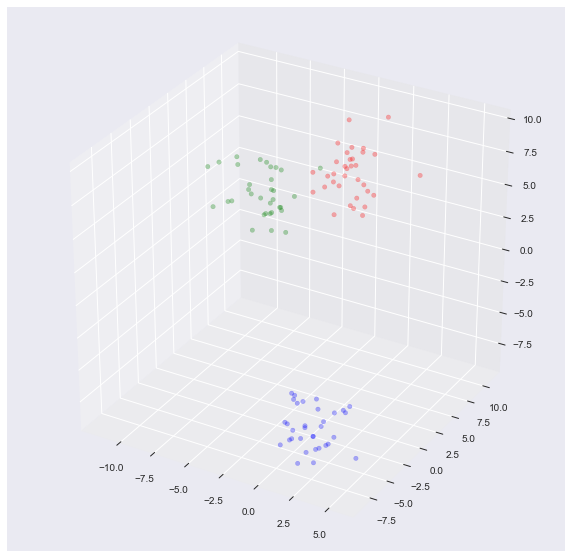

In [9]:
# plot clusters
fig = plt.figure(figsize=(10, 10));
ax = fig.add_subplot(111, projection='3d');
ax.scatter(X[:,0], X[:,1], X[:,2],c=colour_points,alpha=0.3);

# 4. Simulated polynomial with random noise

In [10]:
# lower bound
lower = -10
# upper bound
upper = 10
# set sigma for standard deviation/ spread of noise
sigma = 70
# set numpy random state so repeatable results
np.random.seed(42)

In [11]:
# generate random x values between lower and upper
random_x = np.random.uniform(lower,upper,size=n)
# create random y values from polynomial equation plus some random noise from normal distribution
random_y = 0.03*(random_x**4)+(random_x**3)-0.03*(random_x**2)-random_x+60+np.random.normal(0,sigma,n)

In [12]:
# create exact points for drawing chart
x = np.linspace(lower,upper,n)
y = 0.03*(x**4)+(x**3)-0.03*(x**2)-x+60

#### View simulated data

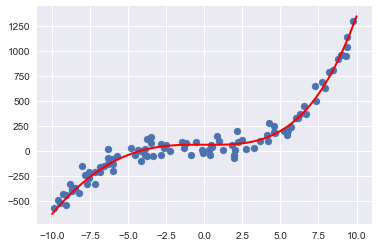

In [13]:
plt.scatter(random_x,random_y);
plt.plot(x,y,linewidth=2, color='r');